In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

df = pd.read_csv("/content/skynet customer retention.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


seniorcitizen is actualy a categorical hence the 25%-50%-75% distribution is not proper

75% customers have tenure less than 55 months

average monthly charges are USD 64.76 where as 25% customers pay more than USD 89.85per month.

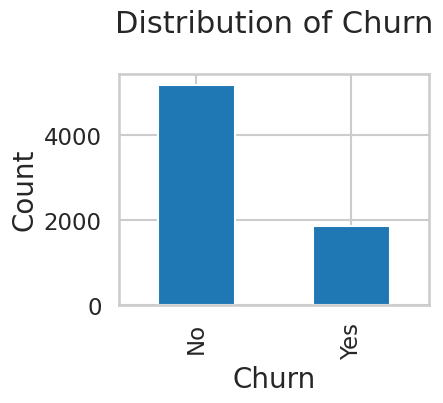

In [ ]:
df['Churn'].value_counts().plot(kind='bar', figsize=(4,3))
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Distribution of Churn')
plt.show()

In [ ]:
100*df['Churn'].value_counts()/len(df)

,count
Churn,
No,73.463013
Yes,26.536987


data is hghly inbalanced

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


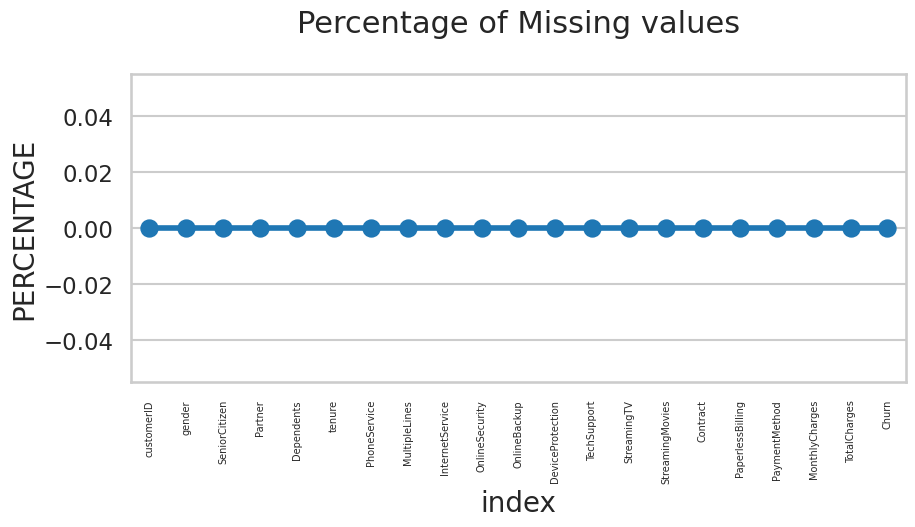

In [ ]:
missing=pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(10,4))
ax=sns.pointplot(x="index",y=0,data=missing)
plt.xticks(rotation=90,fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

#Data Cleaning

In [ ]:
df1=df.copy()

In [ ]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges,errors='coerce')
df1.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df1.loc[df1['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**Missing Value Treatment**

since the % of these records compared to total dataset is very low ie 0.15%,it is safe to ignore them from further processing

In [ ]:
df1.dropna(how='any',inplace=True)

**Devide customers into bins base on tenure eg for tenure< 12months:assign a tenure group if 1-12 for tenure b/w 1-2 yrs tenure grp is 13-24**


In [ ]:
print(df1.tenure.max())

72


In [ ]:
import pandas as pd

# Assuming your dataframe is named 'df1' (replace with 'telco_data' if needed)
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df1['tenure_group'] = pd.cut(df1.tenure, range(1, 80, 12), right=False, labels=labels)

# Get value counts for the tenure groups
tenure_group_counts = df1['tenure_group'].value_counts()

# Display the results
print(tenure_group_counts)

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64


In [ ]:
df1.drop(columns=['customerID','tenure'],axis=1,inplace=True)
df1.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


**DATA EXPLORATION**

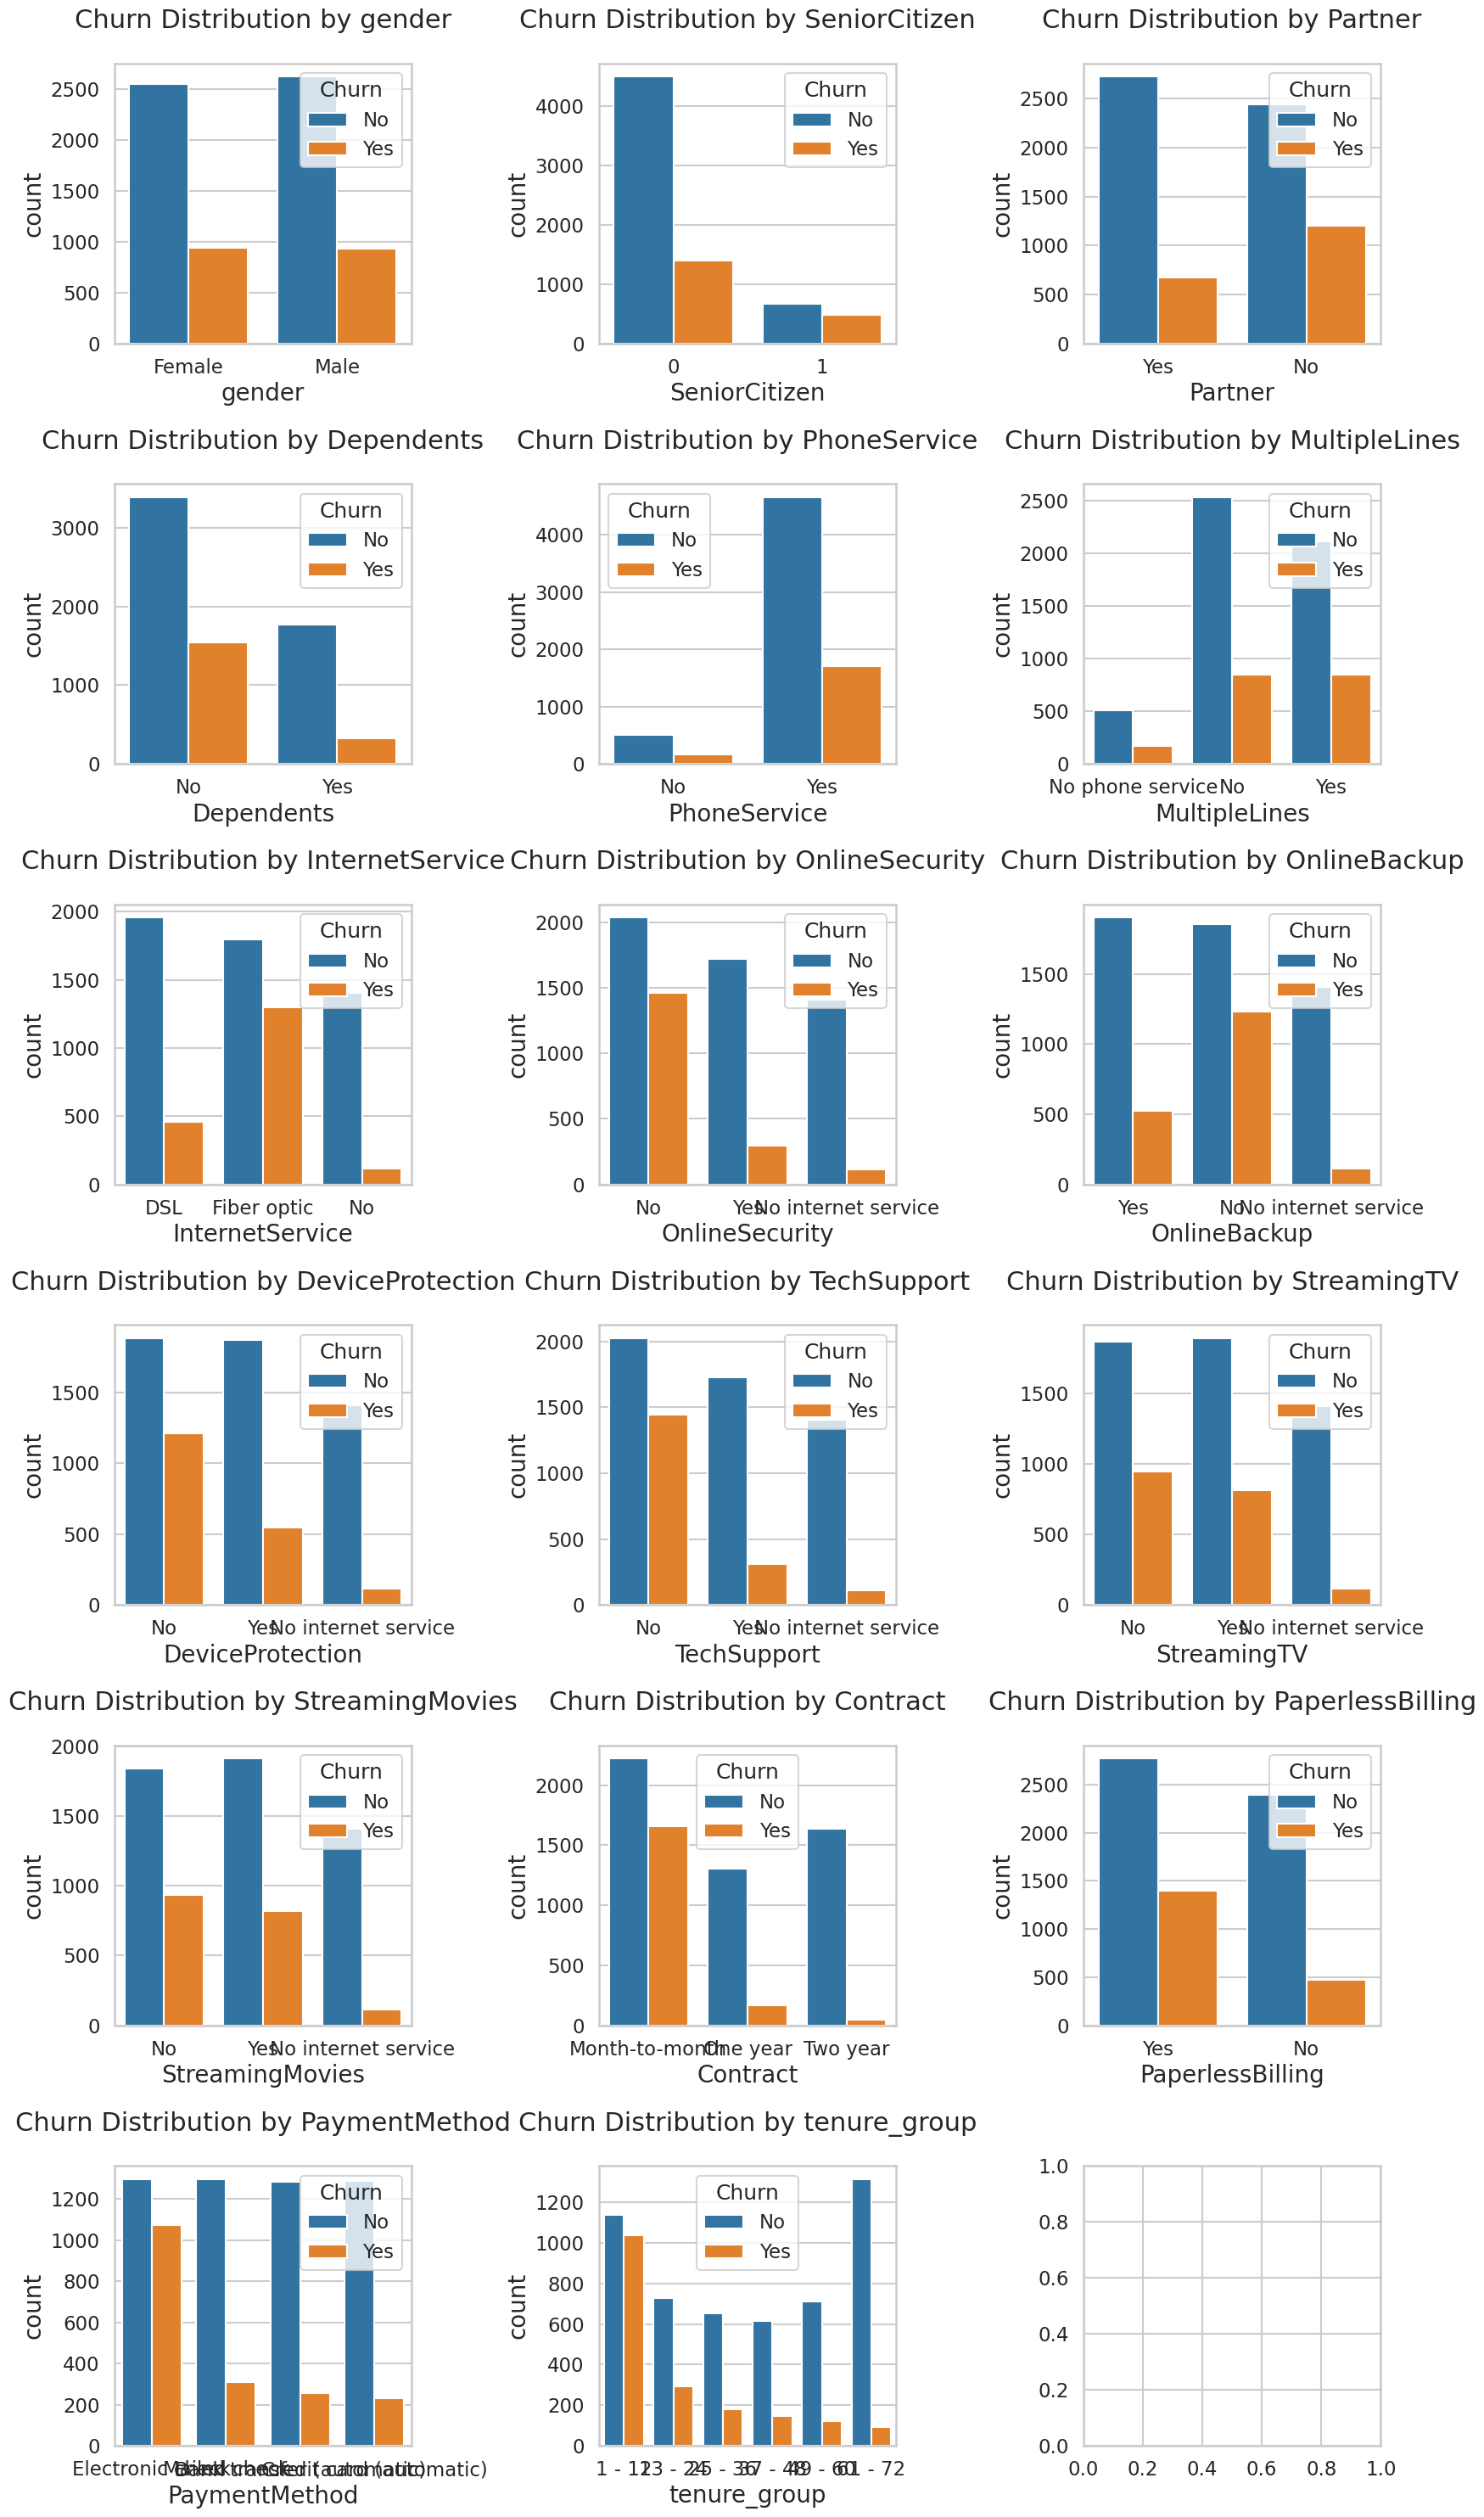

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of rows and columns needed
num_plots = len(df1.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges']).columns)
num_cols = 3  # Number of columns (figures in a row)
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(17, num_rows * 5))  # Adjust figsize as needed

# Iterate through predictors and plot on subplots
for i, predictor in enumerate(df1.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]  # Get the current subplot
    sns.countplot(data=df1, x=predictor, hue='Churn', ax=ax)
    ax.set_title(f'Churn Distribution by {predictor}')  # Add title to subplot

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
df1

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,13 - 24
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,61 - 72
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,1 - 12
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1 - 12


convert the target variable "churn" in to a binary value yes=1 and no=0


In [ ]:
df1['Churn']=np.where(df1.Churn=='Yes',1,0)
df1.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


convert all categorical variables into dummy variables

In [ ]:
df1['SeniorCitizen']=df1['SeniorCitizen'].astype('object')

In [ ]:
dummies=pd.get_dummies(df1,drop_first='true',dtype='int')
dummies.head()

,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,29.85,29.85,0,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
1,56.95,1889.50,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,53.85,108.15,1,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,42.30,1840.75,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,70.70,151.65,1,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0


Relationship b/w mothly charges and total charges

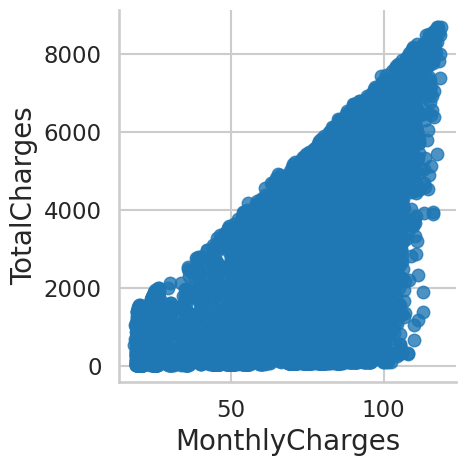

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(data=dummies,x='MonthlyCharges',y='TotalCharges',fit_reg=False)

Text(0.5, 1.0, 'Monthly charges by churn')

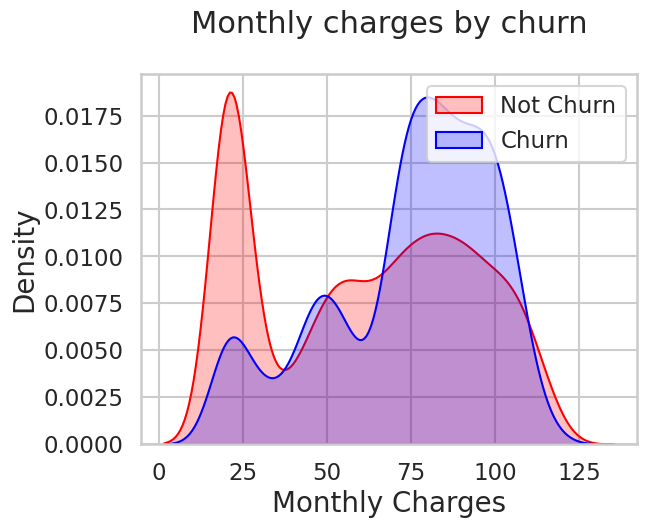

In [ ]:
Mth=sns.kdeplot(dummies.MonthlyCharges[(dummies["Churn"]==0)],color="Red",fill=True)
Mth=sns.kdeplot(dummies.MonthlyCharges[(dummies["Churn"]==1)],color="Blue",fill=True)
Mth.legend(["Not Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

churn is high when monthly charges is high


Text(0.5, 1.0, 'TotalCharges by churn')

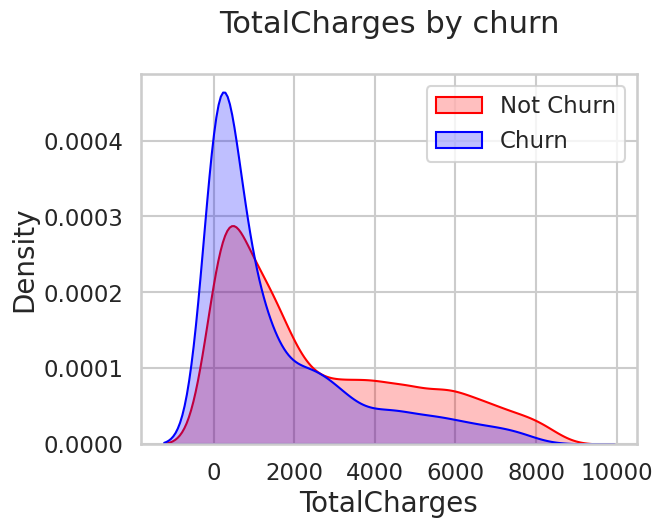

In [ ]:
Tot=sns.kdeplot(dummies.TotalCharges[(dummies["Churn"]==0)],color="Red",fill=True)
Tot=sns.kdeplot(dummies.TotalCharges[(dummies["Churn"]==1)],color="Blue",fill=True)
Tot.legend(["Not Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('TotalCharges')
Tot.set_title('TotalCharges by churn')

**higher churn at lower total charges**

however if we combine 3 parameter monthly charges , tenure and total charges.higher monthly charge cause lower tenure at lower total charge .
the lower tenure and lower total charge have high churn.

<Axes: >

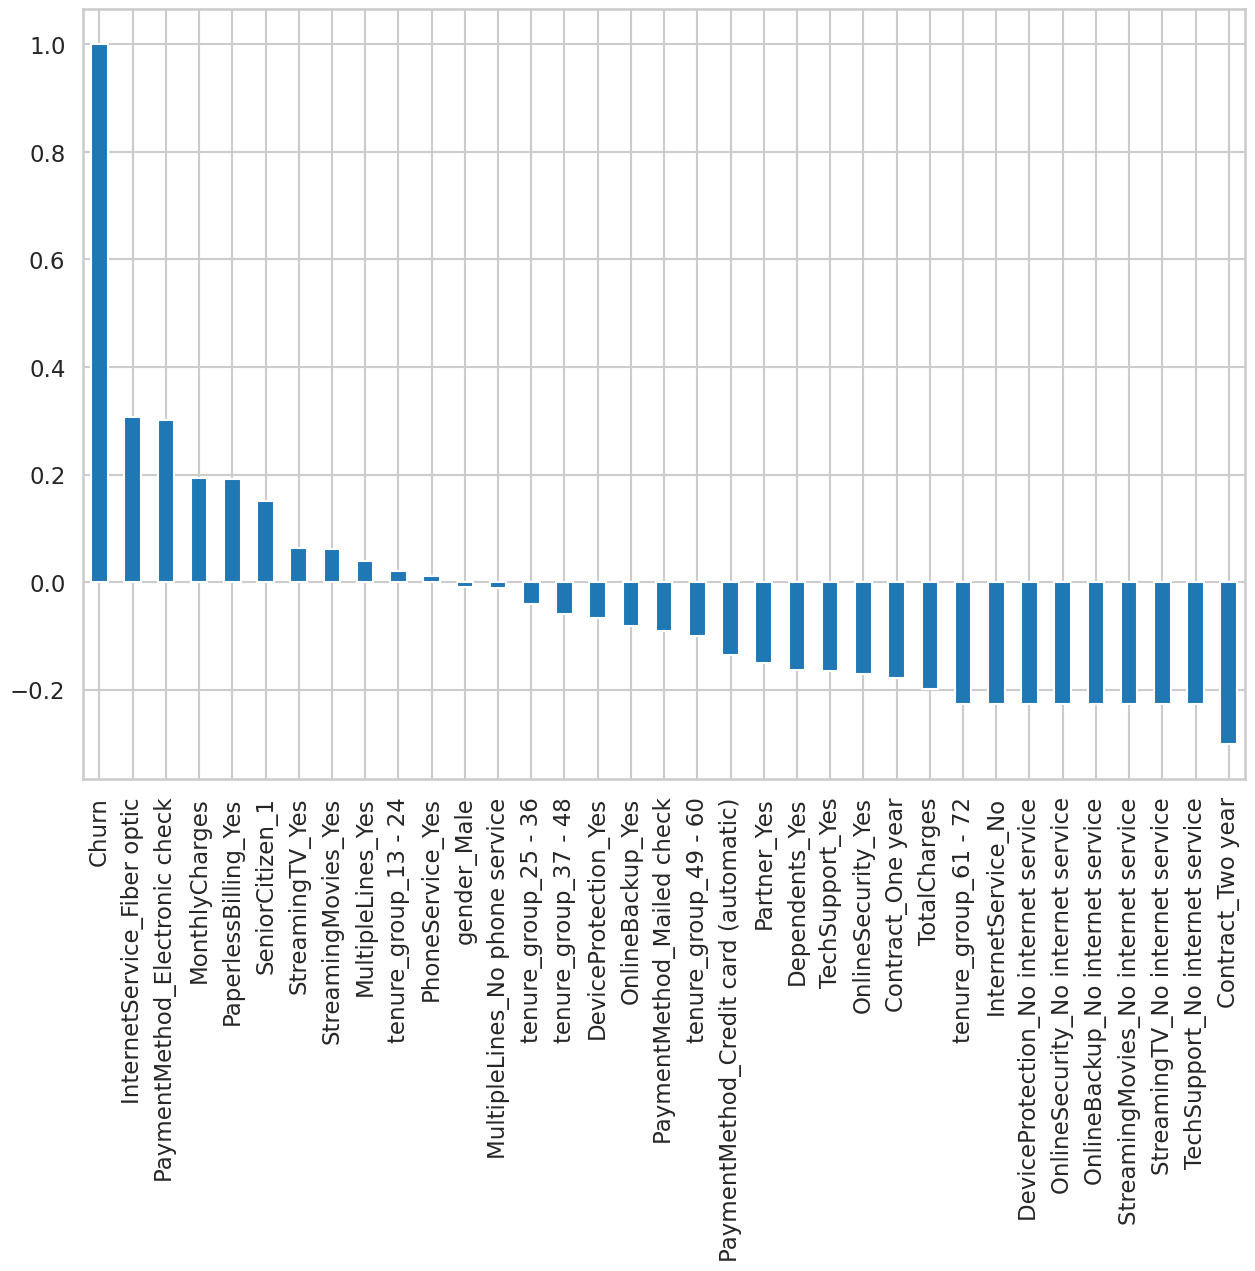

In [ ]:
plt.figure(figsize=(15,10))
dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')


In [ ]:
df2=df1.loc[df1["Churn"]==0]
df3=df1.loc[df1["Churn"]==1]

In [ ]:
def uniplot(df,col,title,hue=None):
  sns.set_style('whitegrid')
  sns.set_context('talk')
  plt.rcParams["axes.labelsize"]=20
  plt.rcParams['axes.titlesize']=22
  plt.rcParams['axes.titlepad']=30
  fig,ax=plt.subplots()
  plt.xticks(rotation=45)
  plt.title(title)
  ax=sns.countplot(data=df,x=col,order=df[col].value_counts().index,hue=hue,palette='bright')
  plt.show()

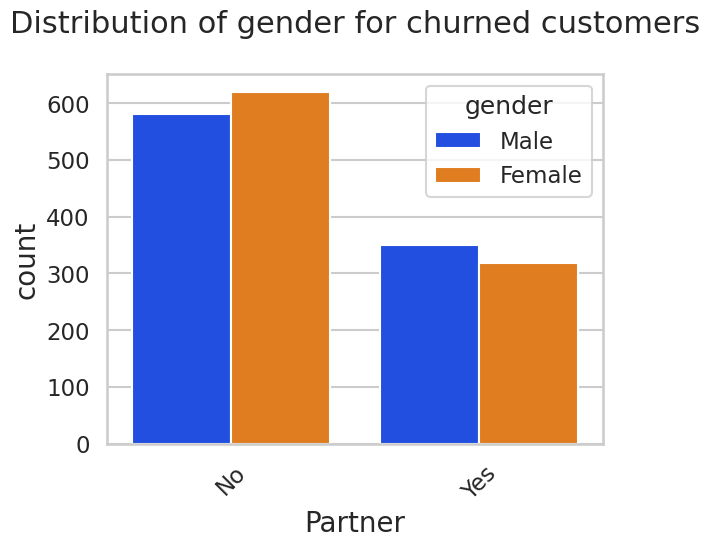

In [ ]:
uniplot(df3,'Partner',title='Distribution of gender for churned customers',hue='gender')

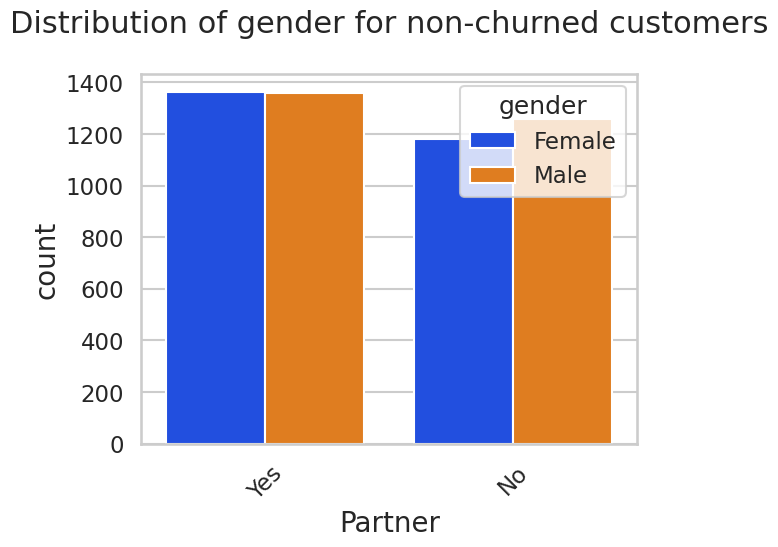

In [ ]:
uniplot(df2,'Partner',title='Distribution of gender for non-churned customers',hue='gender')

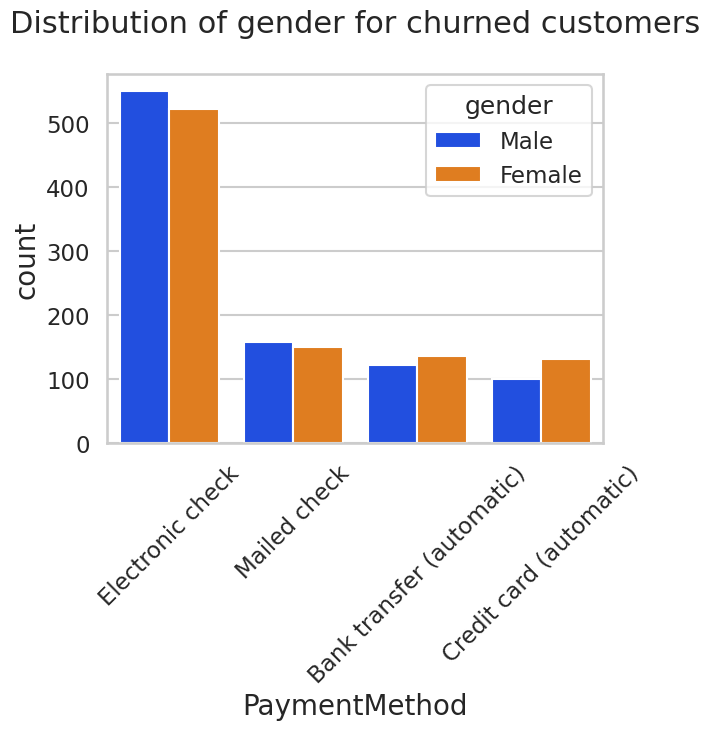

In [ ]:
uniplot(df3,'PaymentMethod',title='Distribution of gender for churned customers',hue='gender')

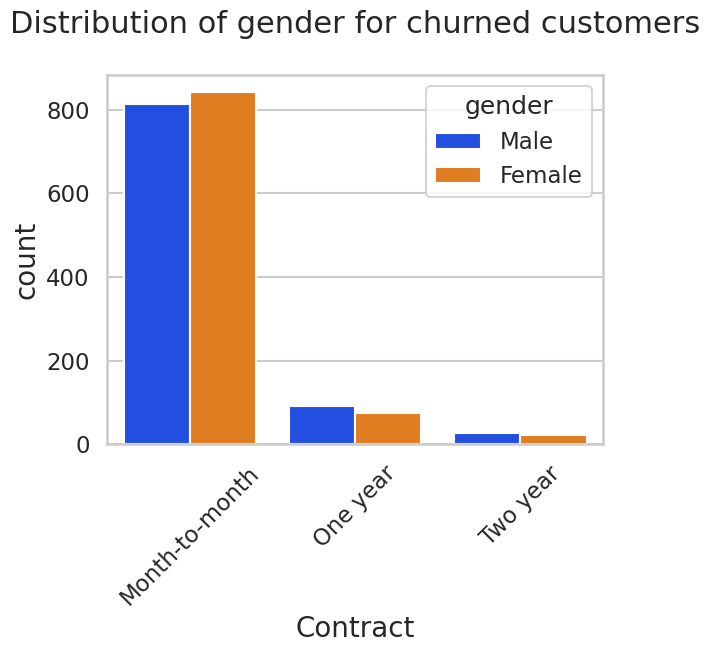

In [ ]:
uniplot(df3,'Contract',title='Distribution of gender for churned customers',hue='gender')

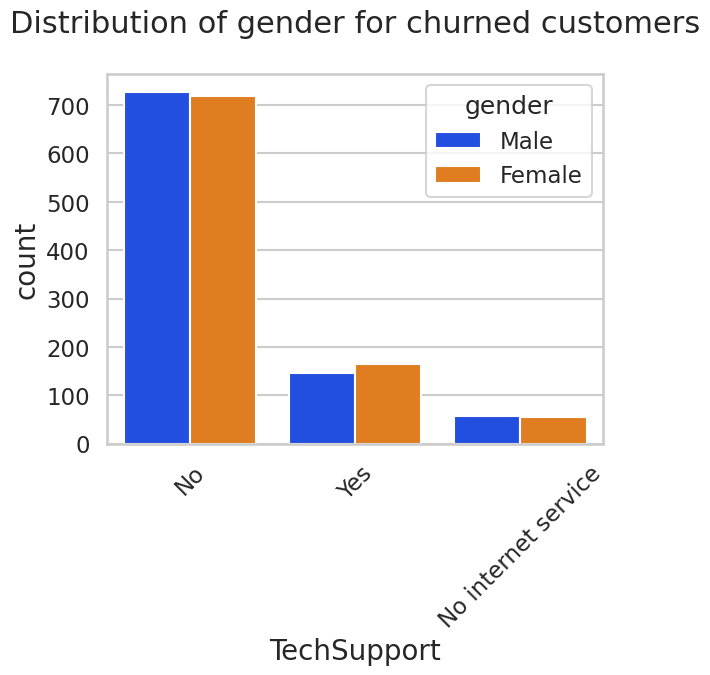

In [ ]:
uniplot(df3,'TechSupport',title='Distribution of gender for churned customers',hue='gender')

#CONCLUSION

These are some of the quick insights from the exersice.

1.Electroni check medium are thr highest churners.

2.Contract Type-monthly customers are more likely to churn beacuse of terms,as they are free.

3.No online seurity,No tech support category are high churners.

3.Non senior Citizens are high churners

Note:there could be many more such insights,so take this as an assignment and try to get more insights:)

In [ ]:
dummies.to_csv('skynet_customer_retention1.csv')

In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN


In [ ]:
df=pd.read_csv('/content/skynet_customer_retention1.csv')
df.head()

,Unnamed: 0,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,0,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0
1,1,56.95,1889.50,0,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
2,2,53.85,108.15,1,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,3,42.30,1840.75,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,4,70.70,151.65,1,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0


In [ ]:
df=df.drop('Unnamed: 0',axis=1)

In [ ]:
x=df.drop('Churn',axis=1)
x

,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,29.85,29.85,0,0,1,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
1,56.95,1889.50,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,53.85,108.15,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,42.30,1840.75,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,70.70,151.65,0,0,0,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,84.80,1990.50,1,0,1,1,1,0,1,0,...,0,1,0,0,1,1,0,0,0,0
7028,103.20,7362.90,0,0,1,1,1,0,1,1,...,0,1,1,0,0,0,0,0,0,1
7029,29.60,346.45,0,0,1,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
7030,74.40,306.60,1,1,1,0,1,0,1,1,...,0,1,0,0,1,0,0,0,0,0


In [ ]:
y=df['Churn']
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7027,0
7028,0
7029,0
7030,1


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Decision Tree Classifier

In [ ]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [ ]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
model_dt.score(x_test,y_test)

0.7953091684434968

In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1045
           1       0.61      0.56      0.58       362

    accuracy                           0.80      1407
   macro avg       0.73      0.72      0.72      1407
weighted avg       0.79      0.80      0.79      1407



As you can see that the accuaray is quite low ,and it's an imbalanced data set,we shouldn't cinsider accuaracy as our metrics to measure the model, as Accuaracy is cursed in imbalanced dataset.

Hence, we need to chek recall,preision & f1 score for the minority class, and it's quite evident that the precison,recall & f1 score is too low for class1,ie churned customers.

Hence, moving ahead to all SMOTEEN(UpSampling+ENN)

In [ ]:
sm=SMOTEENN()
X_resampled,y_resampled=sm.fit_resample(x,y)

In [ ]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled,y_resampled,test_size=0.2)

In [ ]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [ ]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict=model_dt_smote.predict(xr_test)
model_score_r=model_dt_smote.score(xr_test,yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test,yr_predict))

0.9189895470383276
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       542
           1       0.89      0.97      0.93       606

    accuracy                           0.92      1148
   macro avg       0.92      0.92      0.92      1148
weighted avg       0.92      0.92      0.92      1148



In [ ]:
print(metrics.confusion_matrix(yr_test,yr_predict))

[[470  72]
 [ 21 585]]


Now, we an see quite better results,ie Accuracy:92% and a very good recal,precision &f1 score for minority class

let's try with some other classifier

#Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [ ]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
y_pred=model_rf.predict(x_test)

In [ ]:
model_rf.score(x_test,y_test)

0.8002842928216063

In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1045
           1       0.68      0.42      0.52       362

    accuracy                           0.80      1407
   macro avg       0.75      0.68      0.70      1407
weighted avg       0.79      0.80      0.78      1407



In [ ]:
sm=SMOTEENN()
X_resampled1,y_resampled1=sm.fit_resample(x,y)

In [ ]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1,y_resampled1,test_size=0.2)

In [ ]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [ ]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
yr_predict1=model_rf_smote.predict(xr_test1)

In [ ]:
model_score_r1=model_rf_smote.score(xr_test1,yr_test1)

In [ ]:
print(model_score_r1)
print(metrics.classification_report(yr_test1,yr_predict1))

0.9412780656303973
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       513
           1       0.93      0.96      0.95       645

    accuracy                           0.94      1158
   macro avg       0.94      0.94      0.94      1158
weighted avg       0.94      0.94      0.94      1158



In [ ]:
print(metrics.confusion_matrix(yr_test1,yr_predict1))

[[469  44]
 [ 24 621]]


#Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_lr=LogisticRegression(random_state=100,max_iter=6000)

In [ ]:
model_lr.fit(x_train,y_train)

LogisticRegression(max_iter=6000, random_state=100)

In [ ]:
y_pred=model_lr.predict(x_test)

In [ ]:
model_lr.score(x_test,y_test)

0.8059701492537313

In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1045
           1       0.66      0.51      0.57       362

    accuracy                           0.81      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.80      0.81      0.80      1407



In [ ]:
sm=SMOTEENN()
X_resampled2,y_resampled2=sm.fit_resample(x,y)

In [ ]:
xr_train2,xr_test2,yr_train2,yr_test2=train_test_split(X_resampled2,y_resampled2,test_size=0.2)

In [ ]:
model_lr_smote=LogisticRegression(random_state=100,max_iter=6000)

In [ ]:
model_lr_smote.fit(xr_train2,yr_train2)

LogisticRegression(max_iter=6000, random_state=100)

In [ ]:
yr_predict2=model_lr_smote.predict(xr_test2)

In [ ]:
model_score_r2=model_lr_smote.score(xr_test2,yr_test2)

In [ ]:
print(model_score_r2)
print(metrics.classification_report(yr_test2,yr_predict2))

0.9386503067484663
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       515
           1       0.95      0.94      0.94       626

    accuracy                           0.94      1141
   macro avg       0.94      0.94      0.94      1141
weighted avg       0.94      0.94      0.94      1141



In [ ]:
print(metrics.confusion_matrix(yr_test2,yr_predict2))

[[483  32]
 [ 38 588]]


In [ ]:
import pickle
filename = 'model.sav'
pickle.dump(model_rf_smote, open(filename, 'wb'))
load_model = pickle.load(open(filename, 'rb'))
model_score_r1=load_model.score(xr_test1,yr_test1)
print(model_score_r1)

0.9412780656303973
